## Table of content and model results



### Baseline
W2V + CNN, 
>train data: accuracy = 0.9316, precision = 0.8450, recall = 0.8442, f1 = 0.8446
>
>test data: accuracy = 0.8936, precision = 0.7473, recall = 0.8046, f1 = 0.7749

W2V + LSTM
>train data: : accuracy = 0.9099, precision = 0.8210, recall = 0.7554, f1 = 0.7869
>
>test data: : accuracy = 0.8945, precision = 0.7893, recall = 0.7318, f1 = 0.7594

BERT + FCN, 
>train data: : accuracy = 0.9875, precision = 0.9535, recall = 0.9882, f1 = 0.9705
>
>test data: : accuracy = 0.9763, precision = 0.9179, recall = 0.9772, f1 = 0.9466

**BERT + CNN** (Best baseline)
>train data: : accuracy = 0.9894, precision = 0.9707, recall = 0.9784, f1 = 0.9745
>
>test data: : accuracy = 0.9787, precision = 0.9405, recall = 0.9620, f1 = 0.9511

### Tuning

BERT 3e + FCN
>train data: : accuracy = 0.9953, precision = 0.9892, recall = 0.9882, f1 = 0.9887
>
>test data: : accuracy = 0.9869, precision = 0.9625, recall = 0.9772, f1 = 0.9698

BERT 3e + FCN unfreeze
>train data: : accuracy = 0.9953, precision = 1.0000, recall = 0.9774, f1 = 0.9886
>
>test data: : accuracy = 0.9828, precision = 0.9840, recall = 0.9354, f1 = 0.9591

BERT 5e + FCN unfreeze
>train data: : accuracy = 0.9998, precision = 1.0000, recall = 0.9990, f1 = 0.9995
>
>test data: : accuracy = 0.9910, precision = 0.9773, recall = 0.9810, f1 = 0.9791

BERT 3e + CNN unfreeze
>train data: : accuracy = 0.9986, precision = 1.0000, recall = 0.9931, f1 = 0.9965
>
>test data: : accuracy = 0.9861, precision = 0.9767, recall = 0.9582, f1 = 0.9674

**BERT + CNN unfreeze kernel** (Best model)
>train data: : accuracy = 0.9986, precision = 1.0000, recall = 0.9931, f1 = 0.9965
>
>test data: : accuracy = 0.9918, precision = 0.9884, recall = 0.9734, f1 = 0.9808

BERT + CNN unfreeze filters

>train data: : accuracy = 0.9982, precision = 1.0000, recall = 0.9912, f1 = 0.9956
>
>test data: : accuracy = 0.9877, precision = 0.9844, recall = 0.9582, f1 = 0.9711

## Imports

In [ ]:
!pip install gensim==3.8.3 --quiet

     |████████████████████████████████| 24.2 MB 1.4 MB/s 


In [ ]:
!pip install transformers --quiet

     |████████████████████████████████| 4.7 MB 29.1 MB/s 
     |████████████████████████████████| 6.6 MB 55.1 MB/s 
     |████████████████████████████████| 596 kB 74.1 MB/s 
     |████████████████████████████████| 101 kB 12.8 MB/s 


In [ ]:
!pip install -U tensorflow-text==2.8.2 --quiet

     |████████████████████████████████| 4.9 MB 33.6 MB/s 


In [ ]:
# misc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)

# report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

# word2vec
import nltk
import gensim
from nltk.data import find
import tensorflow_text as tf_text

# BERT
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Embedding, Input, Dense, Lambda
from tensorflow.keras.models import Model
from transformers import BertTokenizer, TFBertModel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load and clean data

In [ ]:
# rename uci data to just data
data = pd.read_csv("/content/drive/MyDrive/W266: SMS Spam Detection Final Project/data/data_clean_trans.csv")
data

,Unnamed: 0,spam,text,crowd,spanish,language,english
0,0,0,"Go until jurong point, crazy.. Available only ...",0,"Vaya hasta Jurong Point, loco ... disponible s...",en,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...\n,0,Ok lar ... bromeando wif u oni ...\n,en,Ok lar... Joking wif u oni...\n
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,0,Entrada gratuita en 2 una compensación de wkly...,en,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...,0,No digo tan temprano hor ... ya c ya digo ...\n,en,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro...",0,"No, no creo que vaya a la USF, aunque vive por...",en,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...,...
6102,6102,1,You have passed the official certification onl...,1,Ha aprobado la certificación oficial de la aud...,en,You have passed the official certification onl...
6103,6103,1,"Win The Big J@CKP0T Up To 1M PHP! 100 GET 100,...",1,¡Gana la gran j@ckp0t hasta 1 m php! 100 Get 1...,en,"Win The Big J@CKP0T Up To 1M PHP! 100 GET 100,..."
6104,6104,1,"Hi, I'm a Shopee Hiring Manager and I'm curren...",1,"Hola, soy un gerente de contratación de Shopee...",en,"Hi, I'm a Shopee Hiring Manager and I'm curren..."
6105,6105,1,"4 PCS SOLAR LIGHTS FOR ONLY 1,499 !\nPinaka mu...",1,"¡4 PCS Luces solares por solo 1,499!\n¡La mayo...",fil,"4 pcs solar lights for only 1,499!\nMost cheap..."


In [ ]:
data = data.convert_dtypes()
data.dtypes

Unnamed: 0     Int64
spam           Int64
text          string
crowd          Int64
spanish       string
language      string
english       string
dtype: object

## EDA

In [ ]:
sum(data["spam"] == 1)

1280

In [ ]:
sum(data["spam"] == 0)

4827

## Split the data

In [ ]:
# TO-DO: data is unbalanced we may need to fix it
X, y = data['text'], data['spam']

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    shuffle=True)

## Helper functions

In [ ]:
def print_metrics(test_name, y_true, y_pred):
    print('%s: accuracy = %.4f, precision = %.4f, recall = %.4f, f1 = %.4f'
          % (test_name,
             metrics.accuracy_score(y_true, y_pred),
             metrics.precision_score(y_true, y_pred),
             metrics.recall_score(y_true, y_pred),
             metrics.f1_score(y_true, y_pred)))

## Base models

- Word2Vec embeddings
  - CNN
  - LSTM

- BERT embeddings
  - Fully connected network
  - CNN


#### Word2Vec embeddings

In [ ]:
nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to /root/nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


True

In [ ]:
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [ ]:
# creating a Word2Vec embedding
EMBEDDING_DIM = len(model['university'])      # we know... it's 300

# initialize embedding matrix and word-to-id map:
embedding_matrix = np.zeros((len(model.vocab.keys()) + 1, EMBEDDING_DIM))       
vocab_dict = {}

# build the embedding matrix and the word-to-id map:
for i, word in enumerate(model.vocab.keys()):
    embedding_vector = model[word]
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        vocab_dict[word] = i



In [ ]:
tokenizer = tf_text.WhitespaceTokenizer()
train_tokens = tokenizer.tokenize(train_X)
test_tokens = tokenizer.tokenize(test_X)

In [ ]:
train_tokens[0]

<tf.Tensor: shape=(18,), dtype=string, numpy=
array([b"You've", b'won', b'tkts', b'to', b'the', b'EURO2004', b'CUP',
       b'FINAL', b'or', b'\xc2\xa3800', b'CASH,', b'to', b'collect',
       b'CALL', b'09058099801', b'b4190604,', b'POBOX', b'7876150ppm'],
      dtype=object)>

In [ ]:
# TO-DO: make sure this is tuned
MAX_SEQUENCE_LENGTH = 5

In [ ]:
def sents_to_ids(token_list_list, label_list, num_examples=100000000):
    """
    converting a list of strings to a list of lists of word ids
    """
    text_ids = []
    text_labels = []
    example_count = 0
    use_token_list_list = token_list_list[:num_examples]
    for i, token_list in enumerate(use_token_list_list):
        if i < num_examples:
            try:
                example = []
                for token in list(token_list.numpy()):
                    decoded = token.decode('utf-8').replace('.','').replace(',','').replace('!','')
                    try:
                        example.append(vocab_dict[decoded])
                        
                    except:
                        example.append(43981)
                if len(example) >= MAX_SEQUENCE_LENGTH:
                    text_ids.append(example[:MAX_SEQUENCE_LENGTH])
                    text_labels.append(label_list[i])
                    if example_count % 5000 == 0:
                        print('Examples processed: ', example_count)
                    example_count += 1
                else:
                    pass
            except:
                pass

    
    print('Number of examples retained: ', example_count) 
    return (np.array(text_ids),   np.array(text_labels)) 

In [ ]:
# convert to tensor
y_train = tf.convert_to_tensor(list(train_y))
y_test = tf.convert_to_tensor(list(test_y))

In [ ]:
train_input, train_input_labels = sents_to_ids(train_tokens, y_train)
test_input, test_input_labels = sents_to_ids(test_tokens, y_test)

Examples processed:  0
Number of examples retained:  4605
Examples processed:  0
Number of examples retained:  1147


#### CNN

In [ ]:
cnn_embedding_layer = Embedding(embedding_matrix.shape[0],
                            embedding_matrix.shape[1],
                            embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
# Specify model hyperparameters.
epochs = 10
num_filters = [3, 2, 1]
kernel_sizes = [2, 4, 5]
dense_layer_dims = [100, 30]
dropout_rate = 0.5

In [ ]:
cnn_input_layer = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int64')

In [ ]:
cnn_embeddings = cnn_embedding_layer(cnn_input_layer)

h = cnn_embeddings

In [ ]:
conv_layers_for_all_kernel_sizes = []
for kernel_size, filters in zip(kernel_sizes, num_filters):
    conv_layer = keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(h)
    conv_layer = keras.layers.GlobalMaxPooling1D()(conv_layer)
    conv_layers_for_all_kernel_sizes.append(conv_layer)

In [ ]:
h = keras.layers.concatenate(conv_layers_for_all_kernel_sizes, axis=1)

In [ ]:
h = keras.layers.Dropout(rate=dropout_rate)(h)

In [ ]:
for dense_layer_dim in dense_layer_dims:  
    h = keras.layers.Dense(dense_layer_dim, activation='relu')(h)

In [ ]:
cnn_prediction = keras.layers.Dense(1, activation='sigmoid')(h)

In [ ]:
cnn_model = keras.Model(inputs=cnn_input_layer, outputs=cnn_prediction)
cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',  # From information theory notebooks.
              metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 5, 300)       13194600    ['input_3[0][0]']                
                                                                                                  
 conv1d_7 (Conv1D)              (None, 4, 3)         1803        ['embedding_2[0][0]']            
                                                                                                  
 conv1d_8 (Conv1D)              (None, 2, 2)         2402        ['embedding_2[0][0]']            
                                                                                            

In [ ]:
cnn_history = cnn_model.fit(train_input,
             np.array(train_input_labels),
             validation_data=(test_input, np.array(test_input_labels)),
             batch_size=32,
             epochs=5
             )

Epoch 1/5
144/144 [==============================] - 2s 7ms/step - loss: 0.4915 - accuracy: 0.7768 - val_loss: 0.4079 - val_accuracy: 0.7724
Epoch 2/5
144/144 [==============================] - 1s 5ms/step - loss: 0.3671 - accuracy: 0.8182 - val_loss: 0.3209 - val_accuracy: 0.8692
Epoch 3/5
144/144 [==============================] - 1s 6ms/step - loss: 0.3177 - accuracy: 0.8656 - val_loss: 0.3052 - val_accuracy: 0.8997
Epoch 4/5
144/144 [==============================] - 1s 6ms/step - loss: 0.2858 - accuracy: 0.8808 - val_loss: 0.2876 - val_accuracy: 0.8893
Epoch 5/5
144/144 [==============================] - 1s 5ms/step - loss: 0.2729 - accuracy: 0.8866 - val_loss: 0.2763 - val_accuracy: 0.8936


##### Train report

In [ ]:
dev_pred = cnn_model.predict(train_input)

In [ ]:
test_pred = cnn_model.predict(test_input)

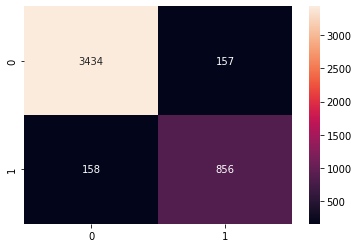

In [ ]:
sns.heatmap(confusion_matrix(np.array(train_input_labels), np.round(dev_pred,0)), annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('W2V + CNN, train data', np.array(train_input_labels), np.round(dev_pred,0))

W2V + CNN, train data: accuracy = 0.9316, precision = 0.8450, recall = 0.8442, f1 = 0.8446


In [ ]:
# TO-DO can't analyze because some texts were discarded during conversion to ids

train_y = train_input_labels
train_y_predict = np.round(dev_pred,0)

##### Test report

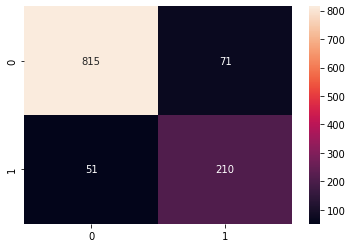

In [ ]:
sns.heatmap(confusion_matrix(np.array(test_input_labels), np.round(test_pred,0)), annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('W2V + CNN, test data', np.array(test_input_labels), np.round(test_pred,0))

W2V + CNN, test data: accuracy = 0.8936, precision = 0.7473, recall = 0.8046, f1 = 0.7749


#### LSTM

In [ ]:
rnn_embedding_layer = Embedding(embedding_matrix.shape[0],
                                embedding_matrix.shape[1],
                                embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False)

In [ ]:
def build_classificaiton_rnn_model(rnn_dim):
  """
  max_length:         maximum input length
  rnn_dim:            dimension of the rnn 
  return_sequences:   should the output vectors get returned?  
  return_state:       should the final cell states get returned?
  """
  
  rnn_input_layer = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int64')

  rnn_embeddings = rnn_embedding_layer(rnn_input_layer)

  # only return the last output from the RNN calculation 
  rnn_output = tf.keras.layers.LSTM(rnn_dim, return_sequences=False, return_state=False, name='LSTM')\
              (rnn_embeddings)

  rnn_hidden = tf.keras.layers.Dense(100, activation='relu', name='rnn_hidden')(rnn_output)


  rnn_classification = tf.keras.layers.Dense(1, 
                                            activation='sigmoid', 
                                            name='rnn_classification')(rnn_hidden)

  # model definition

  rnn_model = tf.keras.models.Model(inputs=rnn_input_layer, outputs=[rnn_classification])

  rnn_model.compile(loss='binary_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,
                                                  beta_1=0.9,
                                                  beta_2=0.999,
                                                  epsilon=1e-07,
                                                  amsgrad=False,
                                                  name='Adam'),
                  metrics='accuracy')
    
  return rnn_model

In [ ]:
rnn_model = build_classificaiton_rnn_model(rnn_dim=3)

In [ ]:
rnn_history = rnn_model.fit(train_input,
             np.array(train_input_labels),
             validation_data=(test_input, np.array(test_input_labels)),
             batch_size=32,
              epochs=5
             )

Epoch 1/5
144/144 [==============================] - 3s 8ms/step - loss: 0.5128 - accuracy: 0.7748 - val_loss: 0.4166 - val_accuracy: 0.7724
Epoch 2/5
144/144 [==============================] - 1s 5ms/step - loss: 0.3345 - accuracy: 0.8595 - val_loss: 0.2933 - val_accuracy: 0.8867
Epoch 3/5
144/144 [==============================] - 1s 5ms/step - loss: 0.2797 - accuracy: 0.8901 - val_loss: 0.2733 - val_accuracy: 0.8849
Epoch 4/5
144/144 [==============================] - 1s 5ms/step - loss: 0.2593 - accuracy: 0.9010 - val_loss: 0.2594 - val_accuracy: 0.8884
Epoch 5/5
144/144 [==============================] - 1s 5ms/step - loss: 0.2454 - accuracy: 0.9060 - val_loss: 0.2546 - val_accuracy: 0.8945


In [ ]:
dev_pred = rnn_model.predict(train_input)
test_pred = rnn_model.predict(test_input)

##### Train report

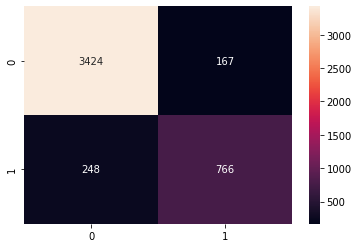

In [ ]:
sns.heatmap(confusion_matrix(np.array(train_input_labels), np.round(dev_pred,0)), annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('W2V + LSTM model, train data: ', np.array(train_input_labels), np.round(dev_pred,0))

W2V + LSTM model, train data: : accuracy = 0.9099, precision = 0.8210, recall = 0.7554, f1 = 0.7869


##### Test report

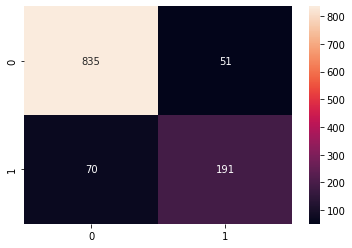

In [ ]:
sns.heatmap(confusion_matrix(np.array(test_input_labels), np.round(test_pred,0)), annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('W2V + LSTM model, test data: ', np.array(test_input_labels), np.round(test_pred,0))

W2V + LSTM model, test data: : accuracy = 0.8945, precision = 0.7893, recall = 0.7318, f1 = 0.7594


#### BERT

In [ ]:
# TO-DO: have to split data again after W2V?
X, y = data['text'], data['spam']

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    shuffle=True)

In [ ]:
# TO-DO: remove this?
# convert to tensor
# y_train = tf.convert_to_tensor(list(train_y))
# y_test = tf.convert_to_tensor(list(test_y))

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
bert_model = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
max_length = 100
#max_length = 160                  # set max_length


all_train_examples = list(train_X)
all_test_examples = list(test_X)


x_train = bert_tokenizer(all_train_examples, 
              max_length=max_length,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')

y_train = tf.convert_to_tensor(list(train_y))

x_test = bert_tokenizer(all_test_examples, 
              max_length=max_length,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')

y_test = tf.convert_to_tensor(list(test_y))

In [ ]:
def create_bert_pooled_model(train_layers=-1,
                          hidden_size = 100, 
                          dropout=0.3,
                          learning_rate=0.00005):
    """
    Build a simple classification model with BERT. Use the Pooled Ouutput for classification purposes
    """

    bert_model = TFBertModel.from_pretrained('bert-base-cased')

    # TO-DO: play around with restricting and not restricting BERT layers
    #restrict training to the train_layers outer transformer layers
    if not train_layers == -1:

            retrain_layers = []

            for retrain_layer_number in range(train_layers):

                layer_code = '_' + str(11 - retrain_layer_number)
                retrain_layers.append(layer_code)

            for w in bert_model.weights:
                if not any([x in w.name for x in retrain_layers]):
                    w._trainable = False

    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='input_ids_layer') #--SOLUTION--
    token_type_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='attention_mask_layer')

    ##bert_inputs = {'input_ids': input_ids,
    #              'token_type_ids': token_type_ids,
    #              'attention_mask': attention_mask
    #               }

    #bert_out = bert_model([input_ids, token_type_ids, attention_mask])

    

    bert_inputs = {'input_ids': input_ids,
                   'token_type_ids': token_type_ids,
                   'attention_mask': attention_mask}         

    bert_out = bert_model(bert_inputs) 

    pooled_token = bert_out[1]

    hidden = tf.keras.layers.Dense(hidden_size, activation='relu', name='hidden_layer')(pooled_token)
    hidden = tf.keras.layers.Dropout(dropout)(hidden)  

    classification = tf.keras.layers.Dense(1, activation='sigmoid',name='classification_layer')(hidden)

    
    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=[classification])
    
    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
                            metrics='accuracy') 


    
    return classification_model

In [ ]:
pooled_bert_model = create_bert_pooled_model()

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


KerasTensor(type_spec=TensorSpec(shape=(None, 100, 768), dtype=tf.float32, name=None), name='tf_bert_model_2/bert/encoder/layer_._11/output/LayerNorm/batchnorm/add_1:0', description="created by layer 'tf_bert_model_2'")


In [ ]:
pooled_bert_model_history = pooled_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                                  y_train,   
                                                  validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                                  batch_size=8, 
                                                  epochs=1)  

611/611 [==============================] - 148s 203ms/step - loss: 0.0862 - accuracy: 0.9734 - val_loss: 0.0653 - val_accuracy: 0.9763


In [ ]:
train_predict_labels = pooled_bert_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = train_predict_labels.round(0)

In [ ]:
test_predict_labels = pooled_bert_model.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

##### Train report

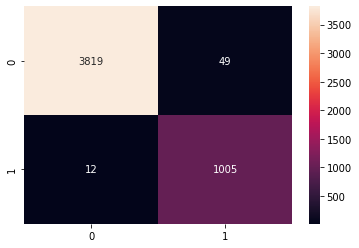

In [ ]:
sns.heatmap(confusion_matrix(np.array(train_y, int), np.array(train_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('BERT + FCN, train data: ', np.array(train_y, int), train_y_predict)

BERT + FCN, train data: : accuracy = 0.9875, precision = 0.9535, recall = 0.9882, f1 = 0.9705


##### Test report

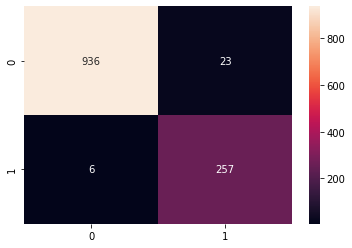

In [ ]:
sns.heatmap(confusion_matrix(np.array(test_y, int), np.array(test_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('BERT + FCN, test data: ', np.array(test_y, int), test_y_predict)

BERT + FCN, test data: : accuracy = 0.9763, precision = 0.9179, recall = 0.9772, f1 = 0.9466


#### BERT Analysis

In [ ]:
train_y_predict = train_y_predict.ravel()

In [ ]:
# spam examples
data['text'][data["spam"] == 1]

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
6102    You have passed the official certification onl...
6103    Win The Big J@CKP0T Up To 1M PHP! 100 GET 100,...
6104    Hi, I'm a Shopee Hiring Manager and I'm curren...
6105    4 PCS SOLAR LIGHTS FOR ONLY 1,499 !
Pinaka mur...
6106    Sissy, 1P lang per bet kay cutt.ly/BingoPlus-P...
Name: text, Length: 1280, dtype: string

In [ ]:
missclassified_text = train_X[train_y != train_y_predict]
missclassified_label = train_y[train_y != train_y_predict]

df_report = pd.DataFrame({'missclassified_text': missclassified_text, 'missclassified_true_label': missclassified_label})

#df_report['missclassified_true_label'].value_counts()
df_report

,missclassified_text,missclassified_true_label
3249,Also track down any lighters you can find,0
5291,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0
3729,The search 4 happiness is 1 of d main sources ...,0
5148,Oh unintentionally not bad timing. Great. Fing...,0
2647,"Em, its olowoyey@ usc.edu have a great time in...",0
...,...,...
5046,We have sent JD for Customer Service cum Accou...,0
1235,"""Hello-/@drivby-:0quit edrunk sorry iff pthis ...",0
3539,We are pleased to inform that your application...,0
2009,See the forwarding message for proof,0


In [ ]:
#train_X[train_y != train_y_predict].loc[1460]

In [ ]:
df_report.loc[2965]

missclassified_text          Do you ever notice that when you're driving, a...
missclassified_true_label                                                    1
Name: 2965, dtype: object

##### Baseline BERT observations
-----------------------------

As expected more text messages that were SPAM got classified as HAM because HAM is the majority class in our dataset.

I looked at a couple examples of texts that got misclassified as HAM and they're tricky to tell if it's a ham or spam messages. The 2 examples contained generic sayings that even a human could mistakenly classify as spam.


*Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur Soul Ur Guide And U Will Never loose in world....gnun - Sent via WAY2SMS.COM*

*1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cancer. 1Lemon/Day=No Fat. 1Cup Milk/day=No Bone Problms 3 Litres Watr/Day=No Diseases Snd ths 2 Whom U Care..:-)*


In general the misclassified messages are hard to tell for certain that they are ham or spam.


#### BERT + CNN

In [ ]:
def create_bert_cnn_model(train_layers=-1,
                          hidden_size = 100, 
                          learning_rate=0.00005,
                          num_filters = [100, 100, 50, 25],
                          kernel_sizes = [3, 5, 10, 20],
                          dense_layer_dims = 100,
                          dropout = 0.3):
    """
    Build a  classification model with BERT, where you apply CNN layers  to the BERT output
    """

    ### YOUR CODE HERE

    bert_model = TFBertModel.from_pretrained('bert-base-cased')

    # TO-DO: play around with restricting and not restricting BERT layers
    #restrict training to the train_layers outer transformer layers
    if not train_layers == -1:

            retrain_layers = []

            for retrain_layer_number in range(train_layers):

                layer_code = '_' + str(11 - retrain_layer_number)
                retrain_layers.append(layer_code)

            for w in bert_model.weights:
                if not any([x in w.name for x in retrain_layers]):
                    w._trainable = False
    
    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='input_ids_layer') 
    token_type_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='attention_mask_layer')

    # bert_inputs = {'input_ids': input_ids} 
    bert_inputs = {'input_ids': input_ids,
                'token_type_ids': token_type_ids,
                'attention_mask': attention_mask}      

    bert_out = bert_model(bert_inputs) 

    pooled_token = bert_out[0][:, 1:-1]

    # CNN -----

    conv_layers_for_all_kernel_sizes = []
    for kernel_size, filters in zip(kernel_sizes, num_filters):
        conv_layer = keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(pooled_token)
        conv_layer = keras.layers.GlobalMaxPooling1D()(conv_layer)
        conv_layers_for_all_kernel_sizes.append(conv_layer)

    h = keras.layers.concatenate(conv_layers_for_all_kernel_sizes, axis=1)
    #h = keras.layers.Dropout(rate=dropout)(h)

    h = tf.keras.layers.Dense(dense_layer_dims, activation='relu')(h)
    h = tf.keras.layers.Dropout(rate=dropout)(h) 

    # -----

    classification = tf.keras.layers.Dense(1, activation='sigmoid',name='classification_layer')(h)

    # classification_model = tf.keras.Model(inputs=[input_ids], outputs=[classification])
    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=[classification])
    
    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
                            metrics='accuracy')


    ### END YOUR CODE
    
    return classification_model

In [ ]:
cnn_bert_model = create_bert_cnn_model()

cnn_bert_model_history = cnn_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                            y_train,   
                                            validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                            batch_size=8, 
                                            epochs=1)  

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


611/611 [==============================] - 160s 216ms/step - loss: 0.0771 - accuracy: 0.9769 - val_loss: 0.0931 - val_accuracy: 0.9787


In [ ]:
predict_labels = cnn_bert_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = predict_labels.round(0)
test_predict_labels = cnn_bert_model.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

##### Train report

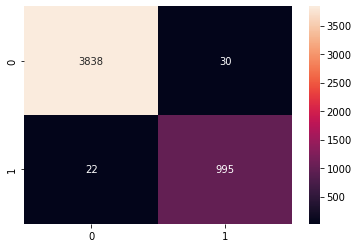

In [ ]:
sns.heatmap(confusion_matrix(np.array(train_y, int), np.array(train_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('BERT + CNN, train data: ', np.array(train_y, int), train_y_predict)

BERT + CNN, train data: : accuracy = 0.9894, precision = 0.9707, recall = 0.9784, f1 = 0.9745


##### Test report

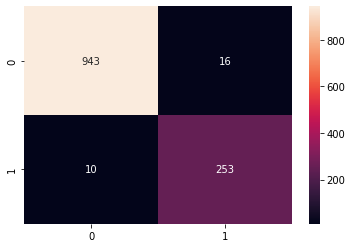

In [ ]:
sns.heatmap(confusion_matrix(np.array(test_y, int), np.array(test_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('BERT + CNN, test data: ', np.array(test_y, int), test_y_predict)

BERT + CNN, test data: : accuracy = 0.9787, precision = 0.9405, recall = 0.9620, f1 = 0.9511


- Train

  - Word2Vec embeddings
    - CNN  |  accuracy = 0.9336, precision = 0.8344, recall = 0.8700, f1 = 0.8519
    - LSTM  |  accuracy = 0.9172, precision = 0.8217, recall = 0.7956, f1 = 0.8085

  - BERT with
    - Fully connected network  |  accuracy = 0.9873, precision = 0.9827, recall = 0.9555, f1 = 0.9689
    - CNN  |  accuracy = 0.9865, precision = 1.0000, recall = 0.9348, f1 = 0.9663

- Test

  - Word2Vec embeddings
    - W2V + CNN, test data: : accuracy = 0.8949, precision = 0.7567, recall = 0.7773, f1 = 0.7669
    - W2V + LSTM model, test data: : accuracy = 0.8897, precision = 0.7452, recall = 0.7656, f1 = 0.7553

  - BERT with
    - BERT + FCN, test data: : accuracy = 0.9885, precision = 0.9841, recall = 0.9611, f1 = 0.9724
    - BERT + CNN, test data: : accuracy = 0.9828, precision = 0.9958, recall = 0.9222, f1 = 0.9576


## Tuned models

#### BERT tuning

**Experiment 1:** Increase the number of epochs because the training kept on improving in the first epoch and we may want to have a couple passes through the model in order to find the most optimal weights for this classification task. Also tune if freezing or unfreezing BERT layers will improve performance. I assume that unfreezing the layers may introduce too many parameters and the model will overfit. But we're expecting the number of epochs to increase performance.

In [ ]:
pooled_bert_model = create_bert_pooled_model()

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
pooled_bert_model_history = pooled_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                                  y_train,   
                                                  validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                                  batch_size=8, 
                                                  epochs=3)  

Epoch 1/3
611/611 [==============================] - 141s 204ms/step - loss: 0.0900 - accuracy: 0.9722 - val_loss: 0.0849 - val_accuracy: 0.9779
Epoch 2/3
611/611 [==============================] - 122s 199ms/step - loss: 0.0545 - accuracy: 0.9865 - val_loss: 0.0702 - val_accuracy: 0.9820
Epoch 3/3
611/611 [==============================] - 122s 199ms/step - loss: 0.0596 - accuracy: 0.9842 - val_loss: 0.0739 - val_accuracy: 0.9869


In [ ]:
train_predict_labels = pooled_bert_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = train_predict_labels.round(0)

In [ ]:
test_predict_labels = pooled_bert_model.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

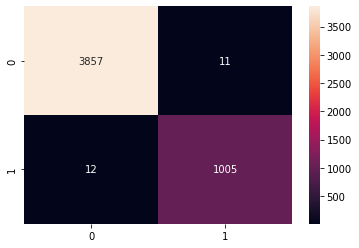

In [ ]:
# train
sns.heatmap(confusion_matrix(np.array(train_y, int), np.array(train_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

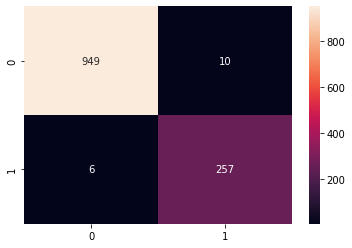

In [ ]:
# test
sns.heatmap(confusion_matrix(np.array(test_y, int), np.array(test_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
# train
print_metrics('BERT 3e + FCN, train data: ', np.array(train_y, int), train_y_predict)

BERT 3e + FCN, train data: : accuracy = 0.9953, precision = 0.9892, recall = 0.9882, f1 = 0.9887


In [ ]:
# test
print_metrics('BERT 3e + FCN, test data: ', np.array(test_y, int), test_y_predict)

BERT 3e + FCN, test data: : accuracy = 0.9869, precision = 0.9625, recall = 0.9772, f1 = 0.9698


In [ ]:
# train
missclassified_text = train_X[train_y != train_y_predict.reshape(-1)]
missclassified_label = train_y[train_y != train_y_predict.reshape(-1)]

df_report = pd.DataFrame({'missclassified_text': missclassified_text, 'true_label': missclassified_label})

df_report

,missclassified_text,true_label
2783,Well at this right I'm gonna have to get up an...,0
1290,Hey...Great deal...Farm tour 9am to 5pm $95/pa...,0
5767,Stay a while 'cause somethings always cooking.,1
4249,"accordingly. I repeat, just text the word ok o...",1
1766,Hi this is yijue... It's regarding the 3230 te...,0
2965,"Do you ever notice that when you're driving, a...",1
5768,"Come on in, feel free to do some looking.",1
5771,My Grandfather smoked his whole life. I was ab...,1
68,"Did you hear about the new ""Divorce Barbie""? I...",1
136,I only haf msn. It's yijue@hotmail.com,0


In [ ]:
# test
missclassified_text = test_X[np.array(test_y, int) != test_y_predict.reshape(-1)]
missclassified_label = test_y[np.array(test_y, int) != test_y_predict.reshape(-1)]

df_report = pd.DataFrame({'missclassified_text': missclassified_text, 'true_label': missclassified_label})

df_report

,missclassified_text,true_label
5738,Hi! Wànt to àvàil Our Pèrsonàl Loàn? Fàst & eà...,1
2663,Hello darling how are you today? I would love ...,1
1260,We have sent JD for Customer Service cum Accou...,0
718,Book which lesson? then you msg me... I will c...,0
263,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...,0
4873,Hi dis is yijue i would be happy to work wif ü...,0
989,Yun ah.the ubi one say if ü wan call by tomorr...,0
5581,N/a,1
4141,Leave it wif me lar... Ü wan to carry meh so h...,0
4330,1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cance...,0


**Experiment 1 Results:** As expected increasing number of epochs slightly improved the f1 score and accuracy. Running it on 3 epochs seemed like a good threshold as the loss function kept decresing but the accuracy stopped improving. We're getting pretty good results with only 18 text messages that got missclassfied from the test.

In [ ]:
# unfreeze layers
pooled_bert_model_unfreeze = create_bert_pooled_model(train_layers=1)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
pooled_bert_model_history = pooled_bert_model_unfreeze.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                                  y_train,   
                                                  validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                                  batch_size=8, 
                                                  epochs=3) 

Epoch 1/3
611/611 [==============================] - 69s 103ms/step - loss: 0.0942 - accuracy: 0.9679 - val_loss: 0.0511 - val_accuracy: 0.9885
Epoch 2/3
611/611 [==============================] - 58s 95ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0602 - val_accuracy: 0.9885
Epoch 3/3
611/611 [==============================] - 59s 96ms/step - loss: 0.0204 - accuracy: 0.9947 - val_loss: 0.0865 - val_accuracy: 0.9828


In [ ]:
train_predict_labels = pooled_bert_model_unfreeze.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = train_predict_labels.round(0)

In [ ]:
test_predict_labels = pooled_bert_model_unfreeze.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

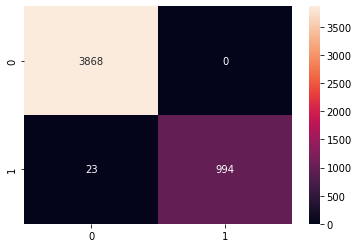

In [ ]:
# train
sns.heatmap(confusion_matrix(np.array(train_y, int), np.array(train_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

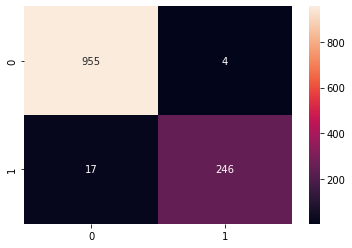

In [ ]:
# test
sns.heatmap(confusion_matrix(np.array(test_y, int), np.array(test_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
# train
print_metrics('BERT 3e + FCN, train data: ', np.array(train_y, int), train_y_predict)

BERT 3e + FCN, train data: : accuracy = 0.9953, precision = 1.0000, recall = 0.9774, f1 = 0.9886


In [ ]:
# test
print_metrics('BERT 3e + FCN, test data: ', np.array(test_y, int), test_y_predict)

BERT 3e + FCN, test data: : accuracy = 0.9828, precision = 0.9840, recall = 0.9354, f1 = 0.9591


In [ ]:
# test
missclassified_text = test_X[np.array(test_y, int) != test_y_predict.reshape(-1)]
missclassified_label = test_y[np.array(test_y, int) != test_y_predict.reshape(-1)]

df_report = pd.DataFrame({'missclassified_text': missclassified_text, 'true_label': missclassified_label})

df_report

,missclassified_text,true_label
5667,Keep safe and let me assist you to have a CÀSH...,1
5738,Hi! Wànt to àvàil Our Pèrsonàl Loàn? Fàst & eà...,1
2663,Hello darling how are you today? I would love ...,1
718,Book which lesson? then you msg me... I will c...,0
263,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...,0
5615,Did you know that people in cluttered homes ar...,1
989,Yun ah.the ubi one say if ü wan call by tomorr...,0
4931,"Hi, the SEXYCHAT girls are waiting for you to ...",1
5581,N/a,1
2680,"New Tones This week include: 1)McFly-All Ab..,...",1


**Experiment 1 Results:** Unfreezing the BERT model layers helped with increasing the F1 score to 0.9745 on running the model for 3 epochs. The performance on the training set was excellent which may mean that we're slightly overfitting. 

Because the performance kept improving we may try to run on a couple more epochs to see if overfitting becomes worse and see if we will hit lower performance on the validation set.

In [ ]:
# unfreeze layers
pooled_bert_model_unfreeze = create_bert_pooled_model(train_layers=1)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# change to 5 epochs
pooled_bert_model_history = pooled_bert_model_unfreeze.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                                  y_train,   
                                                  validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                                  batch_size=8, 
                                                  epochs=5) 

Epoch 1/5
611/611 [==============================] - 68s 100ms/step - loss: 0.0868 - accuracy: 0.9720 - val_loss: 0.0528 - val_accuracy: 0.9869
Epoch 2/5
611/611 [==============================] - 65s 106ms/step - loss: 0.0352 - accuracy: 0.9896 - val_loss: 0.0472 - val_accuracy: 0.9902
Epoch 3/5
611/611 [==============================] - 58s 95ms/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.0500 - val_accuracy: 0.9910
Epoch 4/5
611/611 [==============================] - 59s 96ms/step - loss: 0.0175 - accuracy: 0.9949 - val_loss: 0.0607 - val_accuracy: 0.9918
Epoch 5/5
611/611 [==============================] - 62s 102ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0611 - val_accuracy: 0.9910


In [ ]:
train_predict_labels = pooled_bert_model_unfreeze.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = train_predict_labels.round(0)

In [ ]:
test_predict_labels = pooled_bert_model_unfreeze.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

In [ ]:
# test
missclassified_text = test_X[np.array(test_y, int) != test_y_predict.reshape(-1)]
missclassified_label = test_y[np.array(test_y, int) != test_y_predict.reshape(-1)]

df_report = pd.DataFrame({'missclassified_text': missclassified_text, 'true_label': missclassified_label})

df_report

,missclassified_text,true_label
2663,Hello darling how are you today? I would love ...,1
714,Save yourself the stress. If the person has a ...,0
263,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...,0
989,Yun ah.the ubi one say if ü wan call by tomorr...,0
5581,N/a,1
2680,"New Tones This week include: 1)McFly-All Ab..,...",1
4141,Leave it wif me lar... Ü wan to carry meh so h...,0
4330,1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cance...,0
2774,How come it takes so little time for a child w...,1
5372,dating:i have had two of these. Only started a...,1


In [ ]:
# train
print_metrics('BERT 5e + FCN, train data: ', np.array(train_y, int), train_y_predict)
# test
print_metrics('BERT 5e + FCN, test data: ', np.array(test_y, int), test_y_predict)

BERT 3e + FCN, train data: : accuracy = 0.9998, precision = 1.0000, recall = 0.9990, f1 = 0.9995
BERT 3e + FCN, test data: : accuracy = 0.9910, precision = 0.9773, recall = 0.9810, f1 = 0.9791


**Experiment 1 Results:** Increasing the number of epochs to 5 has resulted in some overfitting, we see a degraded performance on the test set in F1 score and increase in the number of misclassified examples. As a result of this experiment BERT model with unfrozen layers and 3 epochs proved to produce really good results. 

Original untuned model test performance:
accuracy = 0.9828, precision = 0.9797, recall = 0.9377, f1 = 0.9583


Tuned model test performance:
accuracy = 0.9893, precision = 0.9841, recall = 0.9650, f1 = 0.9745


#### BERT + CNN tuning

**Experiment 1:** Increase number of epochs and unfreeze BERT layers, not much improvement.

In [ ]:
cnn_bert_model = create_bert_cnn_model(train_layers=1)

cnn_bert_model_history = cnn_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                            y_train,   
                                            validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                            batch_size=8, 
                                            epochs=3)  

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/3
611/611 [==============================] - 72s 106ms/step - loss: 0.0749 - accuracy: 0.9752 - val_loss: 0.0658 - val_accuracy: 0.9861
Epoch 2/3
611/611 [==============================] - 61s 101ms/step - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.0539 - val_accuracy: 0.9861
Epoch 3/3
611/611 [==============================] - 62s 101ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0538 - val_accuracy: 0.9861


In [ ]:
predict_labels = cnn_bert_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = predict_labels.round(0)
test_predict_labels = cnn_bert_model.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

In [ ]:
print_metrics('BERT + CNN, train data: ', np.array(train_y, int), train_y_predict)
print_metrics('BERT + CNN, test data: ', np.array(test_y, int), test_y_predict)

BERT + CNN, train data: : accuracy = 0.9986, precision = 1.0000, recall = 0.9931, f1 = 0.9965
BERT + CNN, test data: : accuracy = 0.9861, precision = 0.9767, recall = 0.9582, f1 = 0.9674


**Experiment 2:** Change kernel sizes, from lit review Roy et al. used the following kernel sizes. Kernel sizes improved the model. But now it overfits given that we're running it on 3 epochs.

In [ ]:
cnn_bert_model = create_bert_cnn_model(train_layers=1,
                                       kernel_sizes = [2, 3, 4, 5])

cnn_bert_model_history = cnn_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                            y_train,   
                                            validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                            batch_size=8, 
                                            epochs=3)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/3
611/611 [==============================] - 72s 107ms/step - loss: 0.0800 - accuracy: 0.9718 - val_loss: 0.0471 - val_accuracy: 0.9894
Epoch 2/3
611/611 [==============================] - 61s 99ms/step - loss: 0.0315 - accuracy: 0.9912 - val_loss: 0.0531 - val_accuracy: 0.9885
Epoch 3/3
611/611 [==============================] - 61s 100ms/step - loss: 0.0201 - accuracy: 0.9928 - val_loss: 0.0484 - val_accuracy: 0.9918


In [ ]:
predict_labels = cnn_bert_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = predict_labels.round(0)
test_predict_labels = cnn_bert_model.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

In [ ]:
print_metrics('BERT + CNN kernel, train data: ', np.array(train_y, int), train_y_predict)
print_metrics('BERT + CNN kernel, test data: ', np.array(test_y, int), test_y_predict)

BERT + CNN, train data: : accuracy = 0.9986, precision = 1.0000, recall = 0.9931, f1 = 0.9965
BERT + CNN, test data: : accuracy = 0.9918, precision = 0.9884, recall = 0.9734, f1 = 0.9808


**Experiment 3:** Decrease the number of filters to offset overfitting and possibly increase performance

In [ ]:
cnn_bert_model = create_bert_cnn_model(train_layers=1,
                                       kernel_sizes = [2, 3, 4, 5],
                                       num_filters = [32,64,128])

cnn_bert_model_history = cnn_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                            y_train,   
                                            validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                            batch_size=8, 
                                            epochs=3)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/3
611/611 [==============================] - 76s 103ms/step - loss: 0.0742 - accuracy: 0.9760 - val_loss: 0.0517 - val_accuracy: 0.9853
Epoch 2/3
611/611 [==============================] - 60s 98ms/step - loss: 0.0297 - accuracy: 0.9916 - val_loss: 0.0578 - val_accuracy: 0.9869
Epoch 3/3
611/611 [==============================] - 61s 100ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0566 - val_accuracy: 0.9877


In [ ]:
predict_labels = cnn_bert_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = predict_labels.round(0)
test_predict_labels = cnn_bert_model.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

print_metrics('BERT + CNN, train data: ', np.array(train_y, int), train_y_predict)
print_metrics('BERT + CNN, test data: ', np.array(test_y, int), test_y_predict)

BERT + CNN, train data: : accuracy = 0.9982, precision = 1.0000, recall = 0.9912, f1 = 0.9956
BERT + CNN, test data: : accuracy = 0.9877, precision = 0.9844, recall = 0.9582, f1 = 0.9711


#### Cross-validation

In [ ]:
len(train_X)

4885

In [ ]:
len(train_X[:977])
len(train_X[977:1954])
len(train_X[1954:2931])
len(train_X[2931:3908])
len(train_X[3908:4885])

977

In [ ]:
# first fold
len(train_X[977:4885]) + len(train_X[:977])

4885

In [ ]:
# cross_val = 5
# FOLD_SIZE = 977
# for i in range(cross_val):
#   test_1 = train_X.iloc[np.r_[0:FOLD_SIZE*i,FOLD_SIZE*(i+1):FOLD_SIZE*5]]
#   test_2 = train_X[FOLD_SIZE*i:FOLD_SIZE*(i+1)]


In [ ]:
CROSS_VAL = 5
FOLD_SIZE = 977

for i in range(CROSS_VAL):
  max_length = 100
  #max_length = 160                  # set max_length

  all_train_examples = list(train_X.iloc[np.r_[0:FOLD_SIZE*i,FOLD_SIZE*(i+1):FOLD_SIZE*5]])
  all_val_examples = list(train_X[FOLD_SIZE*i:FOLD_SIZE*(i+1)])
  all_test_examples = list(test_X)

  x_train = bert_tokenizer(all_train_examples, 
                max_length=max_length,
                truncation=True,
                padding='max_length', 
                return_tensors='tf')

  y_train = tf.convert_to_tensor(list(train_y.iloc[np.r_[0:FOLD_SIZE*i,FOLD_SIZE*(i+1):FOLD_SIZE*5]]))

  x_test = bert_tokenizer(all_test_examples, 
                max_length=max_length,
                truncation=True,
                padding='max_length', 
                return_tensors='tf')

  y_test = tf.convert_to_tensor(list(test_y))

  x_val = bert_tokenizer(all_val_examples, 
                max_length=max_length,
                truncation=True,
                padding='max_length', 
                return_tensors='tf')

  y_val = tf.convert_to_tensor(list(train_y[FOLD_SIZE*i:FOLD_SIZE*(i+1)]))

  # unfreeze layers
  pooled_bert_model_unfreeze = create_bert_pooled_model(train_layers=1)

  # change to 5 epochs
  pooled_bert_model_history = pooled_bert_model_unfreeze.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                                    y_train,   
                                                    validation_data=([x_val.input_ids, x_val.token_type_ids, x_val.attention_mask], y_val),    
                                                    batch_size=8, 
                                                    epochs=1) 

  train_predict_labels = pooled_bert_model_unfreeze.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
  train_y_predict = train_predict_labels.round(0)

  val_predict_labels = pooled_bert_model_unfreeze.predict([x_val.input_ids, x_val.token_type_ids, x_val.attention_mask])
  val_y_predict = val_predict_labels.round(0)

  # train
  print_metrics('BERT 5e + FCN, train', np.array(train_y.iloc[np.r_[0:FOLD_SIZE*i,FOLD_SIZE*(i+1):FOLD_SIZE*5]], int), train_y_predict)
  # validation
  print_metrics('BERT 5e + FCN, validation', np.array(train_y[FOLD_SIZE*i:FOLD_SIZE*(i+1)], int), val_y_predict)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


489/489 [==============================] - 57s 103ms/step - loss: 0.1052 - accuracy: 0.9624 - val_loss: 0.0428 - val_accuracy: 0.9887
BERT 5e + FCN, train: accuracy = 0.9895, precision = 0.9974, recall = 0.9521, f1 = 0.9743
BERT 5e + FCN, validation: accuracy = 0.9887, precision = 1.0000, recall = 0.9455, f1 = 0.9720


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


489/489 [==============================] - 58s 105ms/step - loss: 0.0972 - accuracy: 0.9665 - val_loss: 0.0299 - val_accuracy: 0.9928
BERT 5e + FCN, train: accuracy = 0.9918, precision = 0.9803, recall = 0.9803, f1 = 0.9803
BERT 5e + FCN, validation: accuracy = 0.9928, precision = 0.9900, recall = 0.9754, f1 = 0.9826


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


489/489 [==============================] - 61s 112ms/step - loss: 0.0995 - accuracy: 0.9655 - val_loss: 0.0705 - val_accuracy: 0.9785
BERT 5e + FCN, train: accuracy = 0.9895, precision = 0.9639, recall = 0.9864, f1 = 0.9750
BERT 5e + FCN, validation: accuracy = 0.9785, precision = 0.9302, recall = 0.9709, f1 = 0.9501


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


489/489 [==============================] - 67s 124ms/step - loss: 0.0956 - accuracy: 0.9678 - val_loss: 0.0485 - val_accuracy: 0.9846
BERT 5e + FCN, train: accuracy = 0.9908, precision = 0.9873, recall = 0.9676, f1 = 0.9774
BERT 5e + FCN, validation: accuracy = 0.9846, precision = 0.9761, recall = 0.9533, f1 = 0.9645


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


489/489 [==============================] - 57s 103ms/step - loss: 0.0970 - accuracy: 0.9672 - val_loss: 0.0277 - val_accuracy: 0.9908
BERT 5e + FCN, train: accuracy = 0.9900, precision = 0.9950, recall = 0.9576, f1 = 0.9759
BERT 5e + FCN, validation: accuracy = 0.9908, precision = 0.9893, recall = 0.9635, f1 = 0.9763


accuracy = 0.9887, precision = 1.0000, recall = 0.9455, f1 = 0.9720

accuracy = 0.9928, precision = 0.9900, recall = 0.9754, f1 = 0.9826

accuracy = 0.9785, precision = 0.9302, recall = 0.9709, f1 = 0.9501

accuracy = 0.9846, precision = 0.9761, recall = 0.9533, f1 = 0.9645

accuracy = 0.9908, precision = 0.9893, recall = 0.9635, f1 = 0.9763

In [ ]:
# cross validation results
cross_val_acc = [0.9887, 0.9928, 0.9785, 0.9846, 0.9908]
cross_val_precision = [1, 0.9900, 0.9302, 0.9761, 0.9893]
cross_val_recall = [0.9455, 0.9754, 0.9709, 0.9533, 0.9635]
cross_val_f1 = [0.9720, 0.9826, 0.9501, 0.9645, 0.9763]

print("mean accuracy", np.mean(cross_val_acc))
print("mean f1", np.mean(cross_val_f1))

print("st dev accuracy", np.std(cross_val_acc))
print("se dev f1", np.std(cross_val_f1))

mean accuracy 0.98708
mean f1 0.9691000000000001
mean accuracy 0.005078346187490561
mean f1 0.011177298421353898


#### Count unknown tokens

In [ ]:
count = 0
for sms in data['text']:
  if ('[UNK]' in bert_tokenizer.tokenize(sms)):
    count += 1

count

13

In [ ]:
count = 0
for sms in data[data['crowd'] == 1]['text']:
  if ('[UNK]' in bert_tokenizer.tokenize(sms)):
    count += 1

count

12

In [ ]:
count = 0
for sms in data[data['crowd'] == 0]['text']:
  if ('[UNK]' in bert_tokenizer.tokenize(sms)):
    count += 1

count

1

13 text with unknown tokens in the data and most of them came from crowdsourced data. 12 unknown tokens in the crowdsourced data.

### CLS based BERT model

In [ ]:
def create_bert_cls_model(train_layers=-1,
                          hidden_size = 100, 
                          dropout=0.3,
                          learning_rate=0.00005):
    """
    Build a simple classification model with BERT. Use the Pooled Ouutput for classification purposes
    """

    bert_model = TFBertModel.from_pretrained('bert-base-cased')

    #restrict training to the train_layers outer transformer layers
    if not train_layers == -1:

            retrain_layers = []

            for retrain_layer_number in range(train_layers):

                layer_code = '_' + str(11 - retrain_layer_number)
                retrain_layers.append(layer_code)

            for w in bert_model.weights:
                if not any([x in w.name for x in retrain_layers]):
                    w._trainable = False

    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='input_ids_layer')
    token_type_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='attention_mask_layer')

    bert_inputs = {'input_ids': input_ids,
                   'token_type_ids': token_type_ids,
                   'attention_mask': attention_mask}         

    bert_out = bert_model(bert_inputs) 

    cls_token = bert_out[0][:, 0]

    hidden = tf.keras.layers.Dense(hidden_size, activation='relu', name='hidden_layer')(cls_token)
    hidden = tf.keras.layers.Dropout(dropout)(hidden)  

    classification = tf.keras.layers.Dense(1, activation='sigmoid',name='classification_layer')(hidden)

    
    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=[classification])
    
    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
                            metrics='accuracy') 


    
    return classification_model

In [ ]:
# unfreeze layers
pooled_bert_cls_model_unfreeze = create_bert_cls_model(train_layers=1)

# change to 5 epochs
cls_bert_model_history = pooled_bert_cls_model_unfreeze.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                                  y_train,   
                                                  validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                                  batch_size=8, 
                                                  epochs=5) 

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/5


611/611 [==============================] - 69s 100ms/step - loss: 0.0789 - accuracy: 0.9730 - val_loss: 0.0657 - val_accuracy: 0.9828
Epoch 2/5
611/611 [==============================] - 59s 96ms/step - loss: 0.0293 - accuracy: 0.9918 - val_loss: 0.0736 - val_accuracy: 0.9836
Epoch 3/5
611/611 [==============================] - 58s 95ms/step - loss: 0.0181 - accuracy: 0.9947 - val_loss: 0.0685 - val_accuracy: 0.9902
Epoch 4/5
611/611 [==============================] - 58s 95ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0579 - val_accuracy: 0.9885
Epoch 5/5
611/611 [==============================] - 58s 95ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0760 - val_accuracy: 0.9902


In [ ]:
predict_labels = pooled_bert_cls_model_unfreeze.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = predict_labels.round(0)
test_predict_labels = pooled_bert_cls_model_unfreeze.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

print_metrics('BERT CLS + FCN, train data: ', np.array(train_y, int), train_y_predict)
print_metrics('test data: ', np.array(test_y, int), test_y_predict)

BERT CLS + FCN, train data: : accuracy = 0.9998, precision = 1.0000, recall = 0.9990, f1 = 0.9995
test data: : accuracy = 0.9902, precision = 0.9846, recall = 0.9696, f1 = 0.9770
